Complete


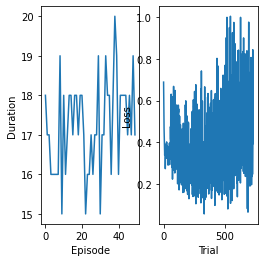

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MovementNN import MovementNN
from NNTrainer import NNTrainer

trainer = NNTrainer()
trainer.train()